<a href="https://colab.research.google.com/github/arpit0498/EIP4/blob/master/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers.convolutional import Conv2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


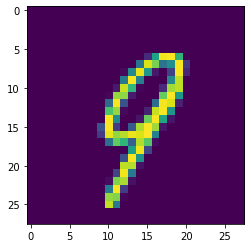

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[22])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation
model = Sequential()
model.add(Conv2D(32, 5, 5, activation='relu',  kernel_initializer=keras.initializers.he_uniform(seed=None),input_shape=(28,28,1)))
model.add(Conv2D(32,1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3) , strides=None ))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        1056      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 265,450
Trainable params: 265,450
Non-trainable params: 0
________________________________________________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  224/60000 [..............................] - ETA: 50s - loss: 5.4536e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 46s 774us/step - loss: 0.0052 - acc: 0.9983
Epoch 2/10
60000/60000 [==============================] - 46s 775us/step - loss: 0.0055 - acc: 0.9982
Epoch 3/10
60000/60000 [==============================] - 47s 784us/step - loss: 0.0043 - acc: 0.9987
Epoch 4/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.0046 - acc: 0.9985
Epoch 5/10
60000/60000 [==============================] - 47s 785us/step - loss: 0.0051 - acc: 0.9983
Epoch 6/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.0028 - acc: 0.9990
Epoch 7/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.0046 - acc: 0.9986
Epoch 8/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.0041 - acc: 0.9989
Epoch 9/10
60000/60000 [==============================] - 47s 779us/step - loss: 0.0035 - acc: 0.9991
Epoch 10/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.0046 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.03635845208045062, 0.991]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[8.29079422e-17 3.27576270e-14 1.32406876e-13 5.10379109e-12
  1.44287510e-16 2.74737762e-15 1.12493130e-22 1.00000000e+00
  3.16726901e-16 3.42446514e-12]
 [2.29714278e-13 2.85480554e-15 1.00000000e+00 7.01852151e-20
  1.13654461e-19 9.84792556e-25 4.14813822e-10 1.02500344e-16
  9.40094763e-15 3.53475421e-19]
 [7.07667454e-08 9.99986649e-01 8.05301070e-08 4.10763979e-13
  4.85054613e-07 1.71597865e-08 3.44789754e-07 8.69609039e-07
  1.14486820e-05 1.29168242e-07]
 [9.99999762e-01 4.23708811e-11 5.15506769e-11 7.79132054e-12
  5.89220409e-11 3.86986450e-12 2.86900615e-07 2.40870185e-10
  5.98253358e-09 1.82641937e-08]
 [1.39324330e-13 3.52642382e-09 1.73469267e-10 1.72218073e-11
  9.99998689e-01 2.63392762e-11 2.24788477e-13 1.52938027e-11
  9.39685840e-09 1.27177202e-06]
 [1.03054472e-08 9.99999285e-01 6.13292350e-09 5.40477028e-15
  1.02027727e-07 1.40275014e-09 9.32198985e-10 2.62924630e-07
  3.30176022e-07 3.36022521e-09]
 [1.30400712e-15 3.62252367e-10 3.36277090e-10 6.70607358e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

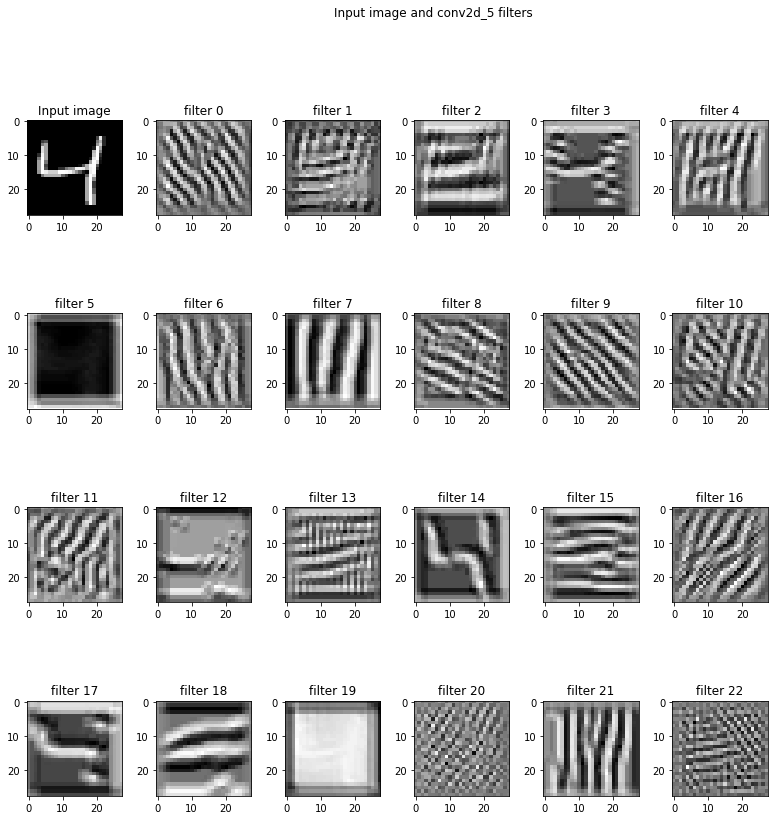

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()